# K-Means Clustering Algorithm Implementation 

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  random_state=3)

In [3]:
X.shape, y.shape

((500, 2), (500,))

In [4]:
# y is not needed since K-Means is unsupervised learning technique
np.unique(y)

array([0, 1, 2, 3, 4])

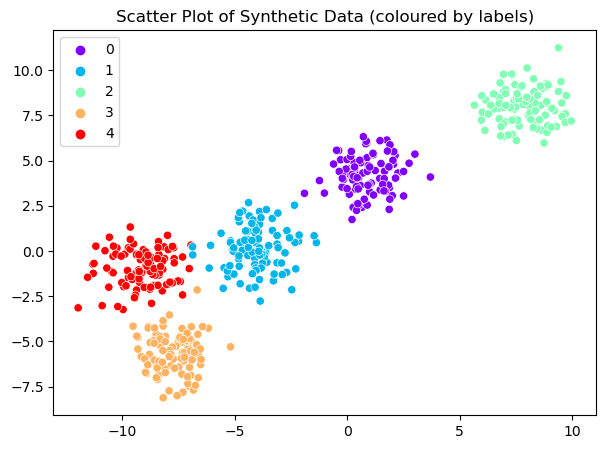

In [5]:
plt.figure(figsize=(7,5))
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y, palette='rainbow')
plt.title("Scatter Plot of Synthetic Data (coloured by labels)")
plt.show()

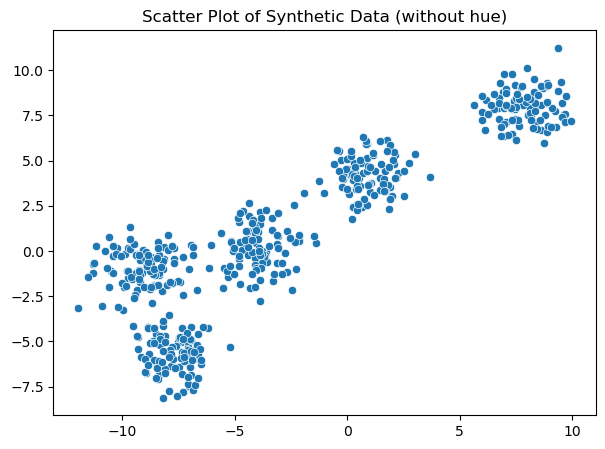

In [6]:
plt.figure(figsize=(7,5))
sns.scatterplot(x = X[:, 0], y = X[:, 1])
plt.title("Scatter Plot of Synthetic Data (without hue)")
plt.show()

In [7]:
# Data Normalization

def normalize(X):
    mean = X.mean(axis = 0)
    std = X.std(axis = 0)
    
    return (X-mean)/std

In [8]:
X = normalize(X)
X[:5, :]

array([[-0.72157916, -1.6885015 ],
       [ 1.68396643,  1.34210435],
       [-0.19184459, -0.25744716],
       [-1.03676225, -1.66567235],
       [-0.789999  , -1.3035583 ]])

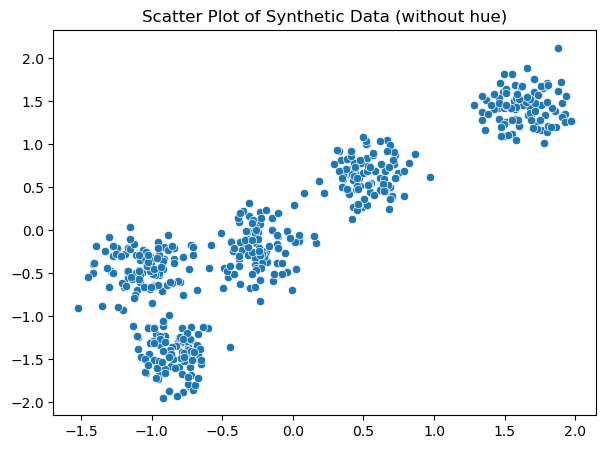

In [9]:
plt.figure(figsize=(7,5))
sns.scatterplot(x = X[:, 0], y = X[:, 1])
plt.title("Scatter Plot of Synthetic Data (without hue)")
plt.show()

In [10]:
def get_kmeans_centers(k=5, n_features=2, colours = ['red', 'green', 'blue', 'orange', 'yellow']):
    
    centroids = {}

    for i in range(k):
        center = 2*(2*(np.random.random((n_features))) -1)

        centroids[i] = {
            'center' : center,
            'color' : colours[i],
            'points' : []
        }
    return centroids

In [12]:
centroids = get_kmeans_centers()
centroids

{0: {'center': array([-0.39172188, -0.82537258]),
  'color': 'red',
  'points': []},
 1: {'center': array([ 0.88265588, -0.9488488 ]),
  'color': 'green',
  'points': []},
 2: {'center': array([-1.59048792, -0.63481621]),
  'color': 'blue',
  'points': []},
 3: {'center': array([-1.08055607,  0.83901179]),
  'color': 'orange',
  'points': []},
 4: {'center': array([-1.44706882,  0.17660297]),
  'color': 'yellow',
  'points': []}}

In [13]:
def distance(a,b):
    dist = np.sqrt(np.sum((a-b)**2))
    return dist

def assigning_points_to_cluster(X, centroids):
        
    m = X.shape[0]
    
    # assigning every point to cluster
    for i in range(m):
        cdist = []
        cpoint = X[i]
        
        for k in centroids.keys():
            dist = distance(cpoint, centroids[k]['center'])
            cdist.append(dist)
            
        clusterID = np.argmin(cdist)
        centroids[clusterID]['points'].append(cpoint)
    return centroids

In [14]:
centroids = get_kmeans_centers()
result = assigning_points_to_cluster(X, centroids)

In [15]:
result

{0: {'center': array([-0.16308521,  0.29802713]),
  'color': 'red',
  'points': [array([1.68396643, 1.34210435]),
   array([-0.19184459, -0.25744716]),
   array([-0.35726153, -0.23051404]),
   array([1.5725262 , 1.69461511]),
   array([1.77864345, 1.01456956]),
   array([-0.23629145, -0.20918178]),
   array([1.79614772, 1.70762982]),
   array([-0.35732124, -0.13320514]),
   array([1.70436696, 1.21450574]),
   array([1.49648329, 1.09341045]),
   array([0.684884  , 0.49805914]),
   array([0.6183887, 0.469815 ]),
   array([-0.21876254, -0.24641756]),
   array([0.34894762, 0.50268985]),
   array([-0.32522576, -0.10414324]),
   array([0.43973301, 0.66613297]),
   array([0.45348101, 0.30914567]),
   array([0.40797945, 0.64070193]),
   array([1.50666922, 1.26099862]),
   array([1.55233798, 1.11769937]),
   array([0.5434694 , 0.44752957]),
   array([0.65060369, 0.5165816 ]),
   array([0.46493748, 0.59468208]),
   array([-0.11157076, -0.37914166]),
   array([1.76044724, 1.16475973]),
   array([

In [79]:
def update_cluster_centers(centroids):
    for k in centroids.keys():
        points = np.array(centroids[k]['points'])
        
        if points.shape[0] > 0:
            new_center = points.mean(axis = 0)
            centroids[k]['center'] = new_center
            centroids[k]['points'] = []
    return centroids

In [45]:
def plotClusters(centroids):
    
    for k in centroids.keys():
        points = np.array(centroids[k]['points'])
        
        if points.shape[0]>0:
            plt.scatter(points[:, 0], points[:, 1], color = centroids[k]['color'])
            plt.title("Scatter Plot")
            
        cluster_coordinates = centroids[k]['center']
        plt.scatter(cluster_coordinates[0], cluster_coordinates[1], marker="*", color="black")

In [23]:
centroids = get_kmeans_centers()
assigned_points = assigning_points_to_cluster(X, centroids)
assigned_points

{0: {'center': array([0.72704131, 1.28668743]),
  'color': 'red',
  'points': [array([1.68396643, 1.34210435]),
   array([1.5725262 , 1.69461511]),
   array([1.79614772, 1.70762982]),
   array([1.70436696, 1.21450574]),
   array([1.49648329, 1.09341045]),
   array([1.50666922, 1.26099862]),
   array([1.55233798, 1.11769937]),
   array([1.76044724, 1.16475973]),
   array([1.88051137, 1.61449179]),
   array([1.55498519, 1.41257811]),
   array([0.43314835, 0.78831008]),
   array([1.45344948, 1.41767057]),
   array([1.78790206, 1.33973835]),
   array([1.58282422, 1.04501618]),
   array([0.32476987, 0.92717751]),
   array([0.52267784, 1.00667943]),
   array([0.72400387, 0.86990712]),
   array([1.70458073, 1.76212678]),
   array([1.79109718, 1.68389753]),
   array([0.74397928, 0.66579001]),
   array([0.82305377, 0.78044045]),
   array([0.73023441, 0.611266  ]),
   array([1.92021084, 1.35253391]),
   array([1.68048139, 1.42780395]),
   array([0.65016239, 0.70030172]),
   array([1.46167809, 1.

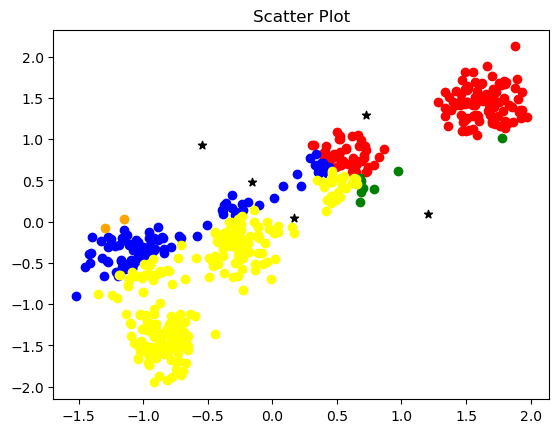

In [46]:
plotClusters(assigned_points)

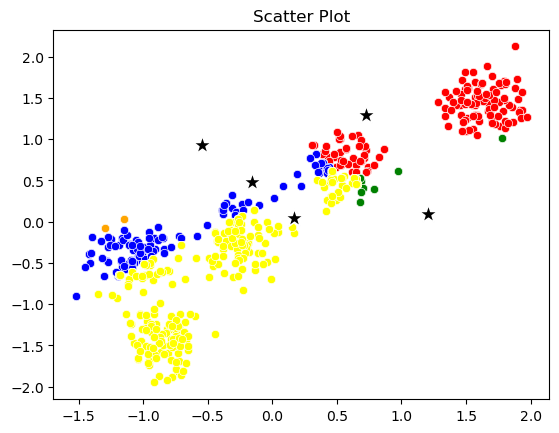

In [72]:
def plotClusters_v2(centroids, ax = None):
    
    if ax is None:
        ax = plt.gca()
        
    for k in centroids.keys():
        points = np.array(centroids[k]['points'])
        
        if points.shape[0]>0:
            axx = sns.scatterplot(x =points[:, 0], y = points[:, 1], color = centroids[k]['color'], ax=ax)
            plt.title("Scatter Plot")
            
        cluster_coordinates = centroids[k]['center']
        axx = sns.scatterplot(x = [cluster_coordinates[0]], y = [cluster_coordinates[1]], marker="*", color="black", s = 200, ax=ax)

plotClusters_v2(assigned_points)

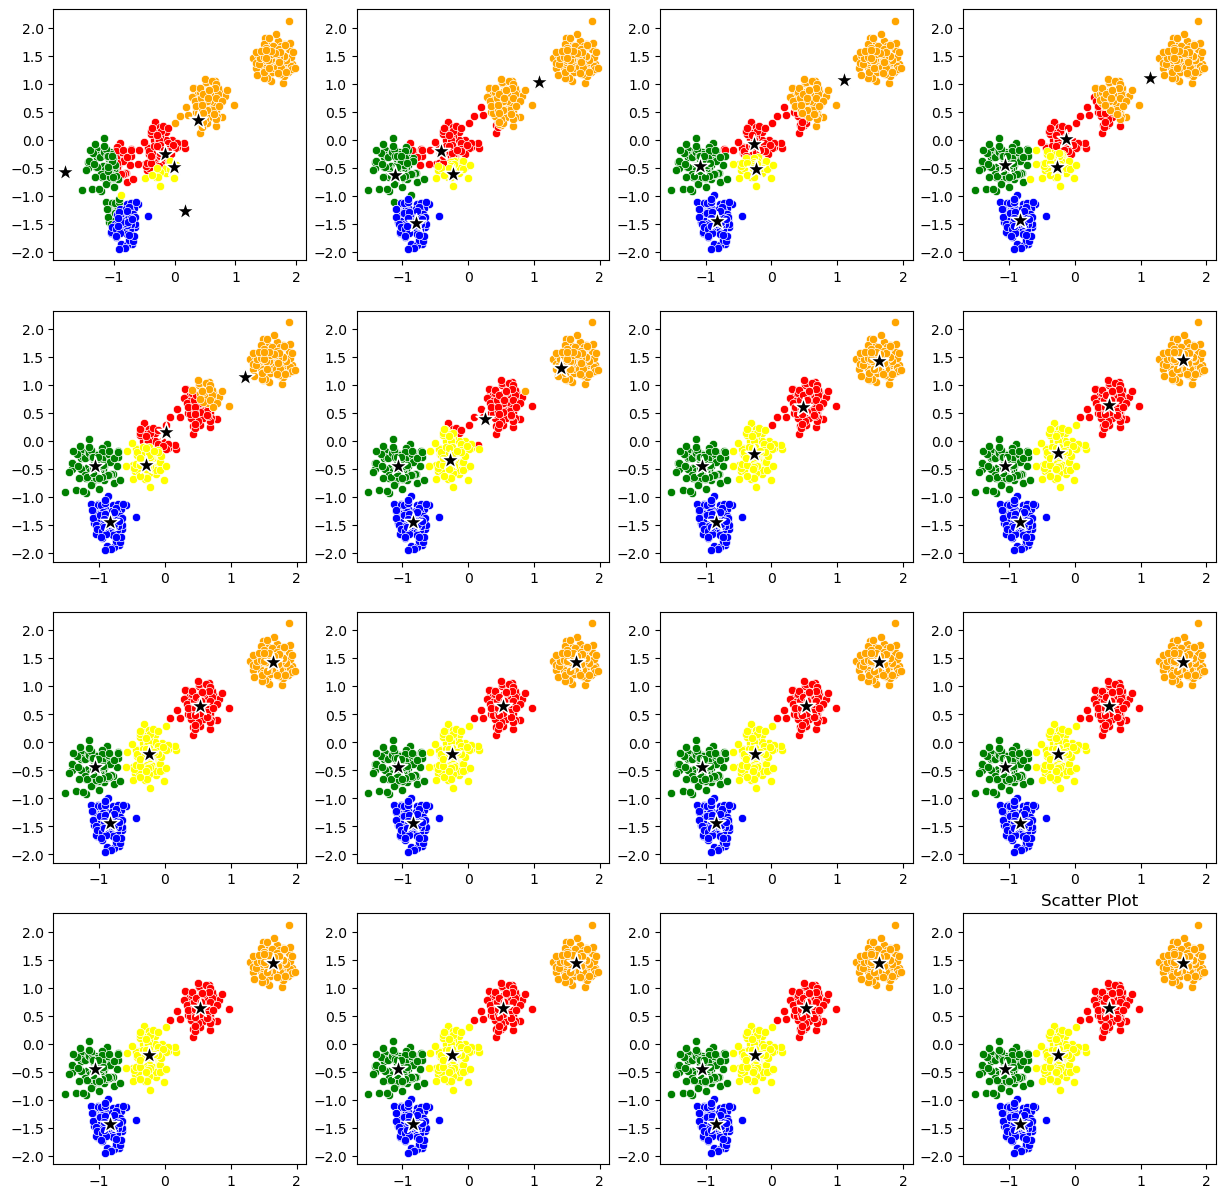

In [83]:
centroids = get_kmeans_centers()

row, col = 4,4
fig, axs = plt.subplots(row, col, figsize = (15,15))

for r in range(row):
    for c in range(col):
        assigned_points = assigning_points_to_cluster(X, centroids)
        plotClusters_v2(assigned_points, axs[r,c])
        centroids = update_cluster_centers(assigned_points)